In [1]:
# Import All Necessary Modules for data unpackaging of PPG and PVT Data.
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import statsmodels
import statistics
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# Get files list and define main heartrate function.

files = list(os.walk("C:/Users/saketh/stuff/Medlytics/Week2Public/Pulse_data/Pulse"))[0][2]
print(files)
def hr_var(filename):
    '''
    Gets the heartrate and variability of a PPG file encoded through .csv and uses find_peaks from scipy to determine heartrate and the variance in the heartrate.
    
    Inputs:
    filename: the path to a csv file.
    
    Returns:
    retval: a list containing the average heartrate and the variance (both floats)
    
    '''
    df1 = pd.read_csv(filename)
    ppg1 = df1.values[6:6007, 1].astype(np.float64)
    peaks, _ = find_peaks(ppg1, height  =np.mean(ppg) + 16, prominence = 6, distance = 20)
    fs = 50
    return([1/(np.mean(np.diff(peaks))/fs)*60, np.var(np.divide(np.diff(peaks), fs))])
def get_heartrate_fft(ppg_csv_filename):
    df1 = pd.read_csv(ppg_csv_filename)
    ppg_info1 = df.loc[0:5, ]
    ppg1 = df1.values[6:6007, 1].astype(np.float64)
    fs = 50
    NFFT = len(ppg1)
    sp = np.fft.fft(ppg1 - np.mean(ppg1),NFFT)/ppg1.shape[0]
    t = np.arange(NFFT)
    freq = fs*np.fft.fftfreq(t.shape[-1])
    return(freq[np.argmax(abs(sp[abs(freq) < 2]))]*60)

['AadiDass-VattamHeartbeat.csv', 'AlexYuHeartbeat.csv', 'AnnaHeHeartbeat.csv', 'CarolZhangHeartbeat.csv', 'DavidDelValleHeartbeat.csv', 'EdwardYanHeartbeat.csv', 'ElaineChuHeartbeat.csv', 'EstebanCintronHeartbeat.csv', 'GovindChadaHeartbeat.csv', 'HarrisBubaloHeartbeat.csv', 'JoyLimHeartbeat.csv', 'JoyLiuHeartbeat.csv', 'MarielaNazarioCastroHeartbeat.csv', 'OdessaThompsonHeartbeat.csv', 'PratikBharadwajHeartbeat.csv', 'SharvilTrifaleHeartbeat.csv', 'ShreyaJainHeartbeat.csv', 'ShuenWuHeartbeat.csv', 'SuatMartinHeartbeat.csv', 'VarunNairHeartbeat.csv', 'VineetChinthakindiHeartbeat.csv', 'VishalKumarHeartbeat.csv', 'YerielMaldonadoHeartbeat.csv']


In [3]:
# One file for testing
df = pd.read_csv("C:/Users/saketh/stuff/Medlytics/Week2Public/Pulse_data/Pulse/AlexYuHeartbeat.csv")
ppg_info = df.loc[0:5, ]
ppg = df.values[6:6007, 1].astype(np.float64)

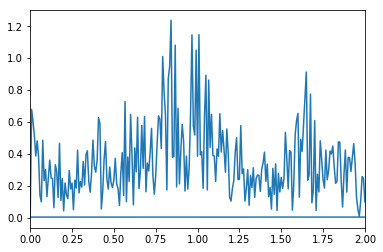

In [4]:
fs = 50
NFFT = 6002
sp = np.fft.fft(ppg - np.mean(ppg),NFFT)/ppg.shape[0]
t = np.arange(NFFT)
freq = fs*np.fft.fftfreq(t.shape[-1])
plt.plot(freq, abs(sp))
plt.xlim([0, 2])
plt.show()

In [5]:
#Calculate the most prominient frequency in bps that is less than 2 (120 bpm)

freq[np.argmax(abs(sp[abs(freq) < 2]))]*60 

50.48317227590803

In [6]:
# Create full list of heart rates. 

# Then use other function to get variability in heart rates (less reliable and useful metric.)

heartrates = []
for file in files:
    heartrates.append(get_heartrate_fft(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Pulse_data/Pulse/" + file))
heartrate_vars = []
for file in files:
    heartrate_vars.append(hr_var(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Pulse_data/Pulse/" + file))
hrs = np.array(heartrates)
hrvars = np.array(heartrate_vars)
hrs = hrs.astype(np.int64)
hrvars = np.round(hrvars.astype(np.float), decimals=3)

### Debugging Cells - Determining HR based on peaks.

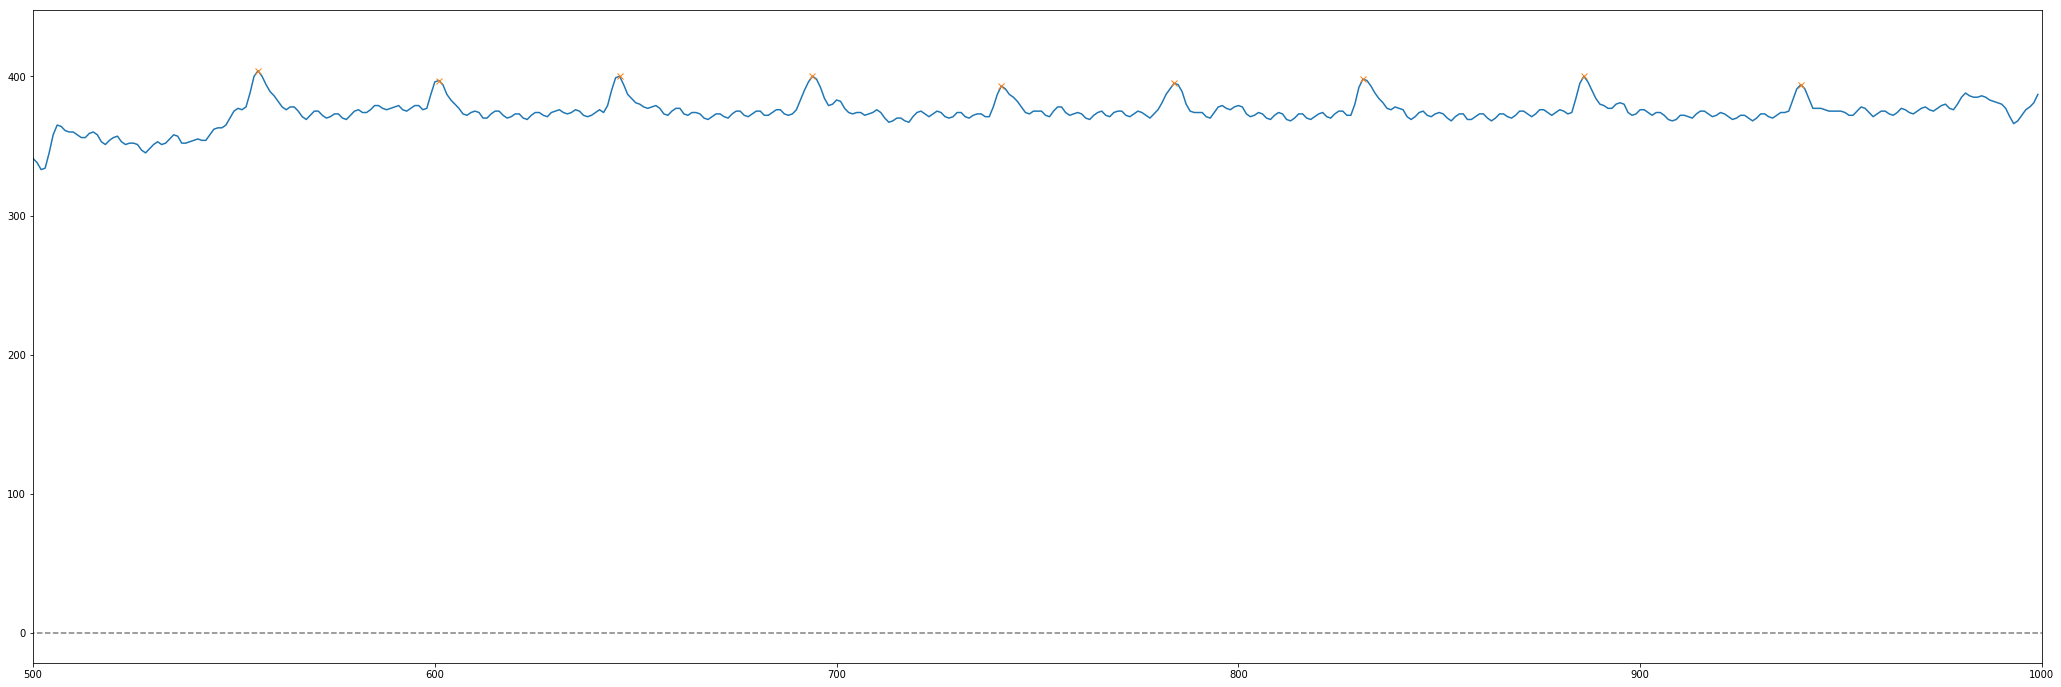

[55.64924114671164, 0.12884760330578518]

In [7]:
df = pd.read_csv("C:/Users/saketh/stuff/Medlytics/Week2Public/Pulse_data/Pulse/VineetChinthakindiHeartbeat.csv")
ppg_info = df.loc[0:5, ]
ppg = df.values[6:6007, 1].astype(np.float64)
peaks, _ = find_peaks(ppg, height  =np.mean(ppg) + 16, prominence = 6, distance = 20)
plt.figure(1, figsize=(36, 12))
plt.plot(ppg[0:1000])
plt.plot(peaks, ppg[peaks], "x")
plt.plot(np.zeros_like(ppg), "--", color="gray")
plt.xlim(500, 1000)
#print
plt.show()
hr_var("C:/Users/saketh/stuff/Medlytics/Week2Public/Pulse_data/Pulse/VineetChinthakindiHeartbeat.csv")

In [8]:
hr = len(peaks)/2
hr

55.5

# Add in Reaction Time Data and Concatenate Full Dataset

In [49]:
reaction_times = pd.read_csv('PVT_withLabels.csv')
reaction_times = reaction_times.rename(columns={'Unnamed: 0': 'Name'})
reaction_times.loc[20, 'Name'] = 'Joy Liu'
fatigued = reaction_times  #.drop(columns=['ReactionTime'])
names = reaction_times.Name.values

,Unnamed: 0,ReactionTime,IsFatigued
0,Yariel,211.305814,1.0
1,David,235.034419,1.0
2,Vineet,204.089341,0.0
3,Edward,208.359465,0.0
4,Carol,177.624628,0.0
5,Joy,244.750930,1.0
6,Sharvill,219.025619,1.0
7,Esteban,186.274978,0.0
8,Pratik,212.151233,1.0
9,Adi,188.077243,0.0


In [10]:
alpha_names = list(np.copy(names))
alpha_names.sort()
alpha_names
pulse_and_fatigue = pd.DataFrame()
alpha_fatigue = fatigued.sort_values(by='Name')
alpha_fatigue.reset_index(drop=True, inplace=True)
alpha_fatigue

,Name,ReactionTime,IsFatigued
0,Adi,188.077243,0.0
1,Alex,239.858044,1.0
2,Anna,230.374861,1.0
3,Carol,177.624628,0.0
4,David,235.034419,1.0
5,Edward,208.359465,0.0
6,Elaine,258.813200,1.0
7,Esteban,186.274978,0.0
8,Govind,176.010119,0.0
9,Harris,207.254737,0.0


In [11]:
dataset = pd.concat((pd.Series(alpha_names), pd.Series(heartrates), pd.Series(hrvars[:, 0]), pd.Series(hrvars[:, 1]), alpha_fatigue.IsFatigued, alpha_fatigue.ReactionTime), axis=1)
dataset = dataset.rename(columns={0: 'Name', 1:'HR', 2:'HR by peaks', 3:'HR variance'})
dataset.loc[20, 'HR variance'] = np.round(0.08, 3)
dataset

,Name,HR,HR by peaks,HR variance,IsFatigued,ReactionTime
0,Adi,75.487419,74.899,0.010,0.0,188.077243
1,Alex,50.491585,55.602,0.073,1.0,239.858044
2,Anna,81.486419,83.417,0.004,1.0,230.374861
3,Carol,85.985669,82.274,0.008,0.0,177.624628
4,David,83.486086,80.999,0.010,1.0,235.034419
5,Edward,68.988502,71.751,0.012,0.0,208.359465
6,Elaine,67.988669,70.199,0.012,1.0,258.813200
7,Esteban,75.987335,81.786,0.011,0.0,186.274978
8,Govind,68.488585,71.717,0.006,0.0,176.010119
9,Harris,80.986502,78.537,0.017,0.0,207.254737


## Add in the Questionnaire Data and Speech Data 

In [12]:
'''
ONLY RUN ONCE
ONLY RUN ONCE
'''
qdata = pd.read_csv('Cognitive_Fatigue_Data.csv')

#  Sort by Name
qdata.sort_values(by='Name', inplace=True)


qdata.reset_index(drop=True, inplace=True)
qdnoname = qdata.drop(columns=['Name'])
dataset = pd.concat((dataset, qdnoname), axis=1)

# Add 'gender' with 1 equals male

dataset.insert(2, 'gender', [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

#Normalize Data

dataset

,Name,HR,gender,HR by peaks,HR variance,IsFatigued,ReactionTime,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Adi,75.487419,1,74.899,0.010,0.0,188.077243,4.50,6.0,107,10.0,3.0,0.00
1,Alex,50.491585,1,55.602,0.073,1.0,239.858044,7.50,8.0,300,5.0,4.0,0.00
2,Anna,81.486419,0,83.417,0.004,1.0,230.374861,7.00,7.0,0,8.0,3.0,0.00
3,Carol,85.985669,0,82.274,0.008,0.0,177.624628,7.00,3.5,45,4.0,3.5,0.75
4,David,83.486086,1,80.999,0.010,1.0,235.034419,6.25,8.0,0,9.5,7.0,2.50
5,Edward,68.988502,1,71.751,0.012,0.0,208.359465,7.00,7.0,150,9.0,8.0,0.00
6,Elaine,67.988669,0,70.199,0.012,1.0,258.813200,8.00,4.0,0,3.0,7.0,1.00
7,Esteban,75.987335,1,81.786,0.011,0.0,186.274978,6.00,3.0,120,6.0,1.0,1.00
8,Govind,68.488585,1,71.717,0.006,0.0,176.010119,4.00,3.0,0,8.0,8.0,0.00
9,Harris,80.986502,1,78.537,0.017,0.0,207.254737,6.00,6.0,15,6.0,3.0,0.00


In [13]:
# Poor Yeriel's Name is Wrong

dataset.loc[22, 'Name'] = "Yeriel"

## Load Sound Data

In [14]:
import parselmouth as pm
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import statsmodels
import statistics
import pandas as pd

In [15]:
speechfiles = list(os.walk(r"C:\Users\saketh\stuff\Medlytics\Week2Public\Speech\Medlytics Voice Data"))[0][2]
intensities = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []] 
pitches =     [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
formants = [[[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]
print(speechfiles)
for file in speechfiles:
    i = speechfiles.index(file)
    soundfile = pm.Sound(r"C:\Users\saketh\stuff\Medlytics\Week2Public\Speech\Medlytics Voice Data\\" + file)
    Int = soundfile.to_intensity()
    Pit = soundfile.to_pitch()
    Form = soundfile.to_formant_burg()
    for val in Int.t_grid():
        intensities[i].append(Int.get_value(val))
    for val in Pit.t_grid():
        pitches[i].append(Pit.get_value_at_time(val))
    for val in Form.t_grid():
        formants[i][0].append(Form.get_value_at_time(1,val))
        formants[i][1].append(Form.get_value_at_time(2,val))
        formants[i][2].append(Form.get_value_at_time(3,val))


['Alex.wav', 'Anna.wav', 'Carol.wav', 'David.wav', 'Edward.wav', 'Elaine.wav', 'Esteban.wav', 'Govind.wav', 'Harris.wav', 'JoyLim.wav', 'JoyLiu.wav', 'Mariela.wav', 'Odessa.wav', 'Pratik.wav', 'Sharvil.wav', 'Shreya.wav', 'Shuen.wav', 'Suat.wav', 'Upamanyu.wav', 'Varun.wav', 'Vineet.wav', 'Vishal.wav', 'Yeriel.wav']


In [16]:
mean_ints = [np.nanmean(lst) for lst in intensities]
pitchvar = [np.nanstd(lst) for lst in pitches]

In [17]:
mean_intensity_data = pd.DataFrame(mean_ints)
pitch_std_data = pd.DataFrame(pitchvar)
mean_intensity_data = mean_intensity_data.rename(columns={0: 'Mean Volume'})
pitch_std_data = pitch_std_data.rename(columns={0:'Pitch STD'})

In [18]:
'''
ONLY RUN ONCE
ONLY RUN ONCE
'''

dataset_sound = pd.concat((dataset, mean_intensity_data, pitch_std_data), axis=1)

In [19]:
##############################
#                            #
#                            #
#           SHOW             #
#                            #
#           FULL             #
#                            #
#         DATASET            #
#                            #
#                            #
#                            #
#                            #
##############################

dataset_sound

,Name,HR,gender,HR by peaks,HR variance,IsFatigued,ReactionTime,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine,Mean Volume,Pitch STD
0,Adi,75.487419,1,74.899,0.010,0.0,188.077243,4.50,6.0,107,10.0,3.0,0.00,43.167504,107.730207
1,Alex,50.491585,1,55.602,0.073,1.0,239.858044,7.50,8.0,300,5.0,4.0,0.00,42.531021,33.274207
2,Anna,81.486419,0,83.417,0.004,1.0,230.374861,7.00,7.0,0,8.0,3.0,0.00,50.163017,55.855667
3,Carol,85.985669,0,82.274,0.008,0.0,177.624628,7.00,3.5,45,4.0,3.5,0.75,40.548177,33.705897
4,David,83.486086,1,80.999,0.010,1.0,235.034419,6.25,8.0,0,9.5,7.0,2.50,47.855458,39.453348
5,Edward,68.988502,1,71.751,0.012,0.0,208.359465,7.00,7.0,150,9.0,8.0,0.00,46.815026,25.742984
6,Elaine,67.988669,0,70.199,0.012,1.0,258.813200,8.00,4.0,0,3.0,7.0,1.00,46.870277,50.211294
7,Esteban,75.987335,1,81.786,0.011,0.0,186.274978,6.00,3.0,120,6.0,1.0,1.00,45.544685,30.261256
8,Govind,68.488585,1,71.717,0.006,0.0,176.010119,4.00,3.0,0,8.0,8.0,0.00,42.304821,98.464906
9,Harris,80.986502,1,78.537,0.017,0.0,207.254737,6.00,6.0,15,6.0,3.0,0.00,43.014361,52.781193


# Unpackage Validation Data

### Do not use to update model!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Unpackage speech data

In [69]:
#Unpackage ALL OF THE SPEECH DATA

val_speechfiles = list(os.walk(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Validation_Data/Speech"))[0][2]
val_intensities = [[], [], [], [], [], [], [], [], [], [], []] 
val_pitches =     [[], [], [], [], [], [], [], [], [], [], []]
val_formants = [[[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]
print(val_speechfiles)
for val_file in val_speechfiles:
    j = val_speechfiles.index(val_file)
    val_soundfile = pm.Sound(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Validation_Data/Speech/" + val_file)
    val_Int = val_soundfile.to_intensity()
    val_Pit = val_soundfile.to_pitch()
    val_Form = val_soundfile.to_formant_burg()
    for val in Int.t_grid():
        val_intensities[j].append(val_Int.get_value(val))
    for val in Pit.t_grid():
        val_pitches[j].append(val_Pit.get_value_at_time(val))
    for val in Form.t_grid():
        val_formants[j][0].append(val_Form.get_value_at_time(1,val))
        val_formants[j][1].append(val_Form.get_value_at_time(2,val))
        val_formants[j][2].append(val_Form.get_value_at_time(3,val))

['Adam.wav', 'Andy.wav', 'Carol2.wav', 'Chris.wav', 'Emily.wav', 'Esteban2.wav', 'Jeanette.wav', 'Saketh.wav', 'Shuen2.wav', 'Suat.wav', 'Yeriel2.wav']


In [77]:
validation_mean_intensities = [np.nanmean(lst) for lst in val_intensities]
validation_pitchvar = [np.nanstd(lst) for lst in val_pitches]
validation_mean_intensities

[50.35242149264548,
 43.42952330444105,
 41.29419787189885,
 51.329818715041206,
 41.09821546080025,
 41.459238610268876,
 46.76483505541817,
 43.33039370079838,
 42.8209133109378,
 49.41322266256903,
 46.54234525696624]

In [79]:
val_mean_intensity_data = pd.DataFrame(validation_mean_intensities)
val_pitch_std_data = pd.DataFrame(validation_pitchvar)
val_mean_intensity_data = val_mean_intensity_data.rename(columns={0: 'Mean Volume'})
val_pitch_std_data = val_pitch_std_data.rename(columns={0:'Pitch STD'})

### Unpackage PVT data

In [52]:
val_pvt_raw = pd.read_csv(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Validation_Data/PVTdata.csv")
val_pvt = val_pvt_raw/1000 # Convert to ms
val_pvt[val_pvt<100]=np.nan
val_pvt[val_pvt>380]=np.nan

In [59]:
RT = pd.DataFrame.mean(val_pvt)

In [61]:
med_val = np.nanmedian(RT.values)

label = RT > med_val

val_labels=pd.DataFrame([RT, label])

val_labels=val_labels.transpose()
val_labels.columns = ['ReactionTime','IsFatigued']
val_labels.reset_index(inplace=True) # Move Name indexer to a new column
val_labels.rename(columns={'index':'Name'}, inplace=True)
val_labels.sort_values(by='Name', inplace=True)
val_labels.reset_index(inplace=True, drop=True) # Move Name indexer to a new column
val_labels

194.33177551020412


,Name,ReactionTime,IsFatigued
0,Adam,188.211675,0.0
1,Andy,194.331776,0.0
2,Carol2,186.791568,0.0
3,Chris,183.690039,0.0
4,Emily,243.863947,1.0
5,Esteban2,181.998067,0.0
6,Jeanette,249.066118,1.0
7,Saketh,189.151029,0.0
8,Shuen2,200.468500,1.0
9,Suat2,240.748805,1.0


### Unpackage heartrate data

In [84]:
val_hr_files = list(os.walk("C:/Users/saketh/stuff/Medlytics/Week2Public/Validation_Data/PPG"))[0][2]
print(val_hr_files)

val_heartrates = []
for file in val_hr_files:
    heartrates.append(get_heartrate_fft(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Validation_Data/PPG/" + file))
val_heartrate_vars = []
for file in val_hr_files:
    val_heartrate_vars.append(hr_var(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Validation_Data/PPG/" + file))
val_hrs = np.array(val_heartrates)
val_hrvars = np.array(val_heartrate_vars)
val_hrs = val_hrs.astype(np.int64)
val_hrvars = np.round(val_hrvars.astype(np.float), decimals=3)

val_heartrates = pd.concat((pd.Series(val_heartrates), pd.Series(val_hrvars[:, 0]), pd.Series(val_hrvars[:, 1])), axis=1)
val_heartrates = val_heartrates.rename(columns={0: 'HR', 1:'HR by peaks', 2:'HR variance'})
val_heartrates

['AdamHeartbeat.csv', 'AndyHeartbeat.csv', 'Carol2Heartbeat.csv', 'ChrisHeartbeat.csv', 'EmilyHeartbeat.csv', 'Esteban2Heartbeat.csv', 'JeanetteHeartbeat.csv', 'SakethHeartbeat.csv', 'Shuen2Heartbeat.csv', 'Suat2Heartbeat.csv', 'Yeriel2Heartbeat.csv']


,HR,HR by peaks,HR variance
0,NaN,53.635,0.448
1,NaN,66.410,0.007
2,NaN,75.841,0.006
3,NaN,78.616,0.009
4,NaN,70.423,0.007
5,NaN,75.529,0.106
6,NaN,67.303,0.022
7,NaN,59.336,0.039
8,NaN,77.621,0.071
9,NaN,79.264,0.053


### Unpackage survey data

In [85]:
survey = pd.read_csv(r"C:/Users/saketh/stuff/Medlytics/Week2Public/Validation_Data/Survey Data - Sheet1.csv")

In [86]:
survey.sort_values(by='Name',inplace=True)
survey.reset_index(inplace=True, drop=True)
full_val_data = pd.concat((val_labels, val_pitch_std_data, val_mean_intensity_data, val_heartrates, survey), axis=1)
full_val_data = full_val_data.rename(columns={0: 'Name', 1:'HR', 2:'HR by peaks', 3:'HR variance'})
full_val_data

,Name,ReactionTime,IsFatigued,Pitch STD,Mean Volume,HR,HR by peaks,HR variance,Name,sleep,fatigue scale,exercise(min),eating scale,stress scale,caffeine
0,Adam,188.211675,0.0,44.979282,50.352421,NaN,53.635,0.448,Adam,6.0,4,20,8,7,4.0
1,Andy,194.331776,0.0,89.576544,43.429523,NaN,66.410,0.007,Andy,7.5,1,0,5,2,0.0
2,Carol2,186.791568,0.0,47.268373,41.294198,NaN,75.841,0.006,Carol2,6.5,6,0,4,5,0.0
3,Chris,183.690039,0.0,65.669998,51.329819,NaN,78.616,0.009,Chris,5.5,7,30,6,7,4.0
4,Emily,243.863947,1.0,49.453188,41.098215,NaN,70.423,0.007,Emily,5.5,6,60,4,4,0.0
5,Esteban2,181.998067,0.0,108.182026,41.459239,NaN,75.529,0.106,Esteban2,6.0,2,0,8,2,0.0
6,Jeanette,249.066118,1.0,44.622148,46.764835,NaN,67.303,0.022,Jeanette,5.5,5,75,7,7,0.0
7,Saketh,189.151029,0.0,58.822730,43.330394,NaN,59.336,0.039,Saketh,8.5,4,40,7,4,0.0
8,Shuen2,200.468500,1.0,75.455855,42.820913,NaN,77.621,0.071,Shuen2,7.0,3,0,6,4,0.5
9,Suat2,240.748805,1.0,60.236320,49.413223,NaN,79.264,0.053,Suat2,6.0,6,10,7,4,0.0


## Pick Features and Train Model (remember to cross validate)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1, figsize=(12, 12))
sns.heatmap(dataset_sound.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.
#!pip install graphviz
import graphviz

xcols = ['exercise(min)', 'sleep', 'Pitch STD'] #pick feature columns, 'caffeine ' has a space in the key like so.
ycols = ['IsFatigued']

X_train, X_test, y_train, y_test = train_test_split(dataset_sound[xcols], dataset_sound[ycols], random_state=1, stratify=dataset_sound["IsFatigued"], test_size=0.3)

model = kN
results = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

y_train_predict = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)
y_test_predict = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

print(cross_val_score(model, dataset_sound[xcols], dataset_sound[ycols], cv=5))
print(np.mean(cross_val_score(model, dataset_sound[xcols], dataset_sound[ycols], cv=5)))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:,1])

roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train Acc: ", metrics.accuracy_score(y_train, y_train_predict))
print("Test Acc: ", metrics.accuracy_score(y_test, y_test_predict))